<h1 style="font-size:3rem;color:purple;">Exploratory Data Analysis of Titanic Dataset</h1>
<h1 style="font-size:1.5rem;color:purple;">Author: Brooke Richards</h1>
<h1 style="font-size:1.5rem;color:purple;">Date: 8 June 2024</h1>

Project 6 requries us to use Jupyter, pandas, Seaborn, and other tools to work with data. We'll create a notebook that presents data nicely, with tables for analysis and include interesting graphs and charts.


**Import Dependencies**

In [15]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

**Data Acquisition**

In [19]:
# load your data
df = sns.load_dataset('titanic')

# inspect first rows and columns of the dataset
print(df.head()[df.columns[:5]])

   survived  pclass     sex   age  sibsp
0         0       3    male  22.0      1
1         1       1  female  38.0      1
2         1       3  female  26.0      0
3         1       1  female  35.0      1
4         0       3    male  35.0      0


**Initial Data Inspection**

In [22]:
print(df.head(10)) # displays first ten rows
print(df.shape) # displays number of rows and columns in dataset
print(df.dtypes) # displays type of data in each column

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

**Initial Descriptive Statistics**

In [23]:
print(df.describe()) # display summary statistics for each column

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


**Initial Data Distribution for Numerical Columns**

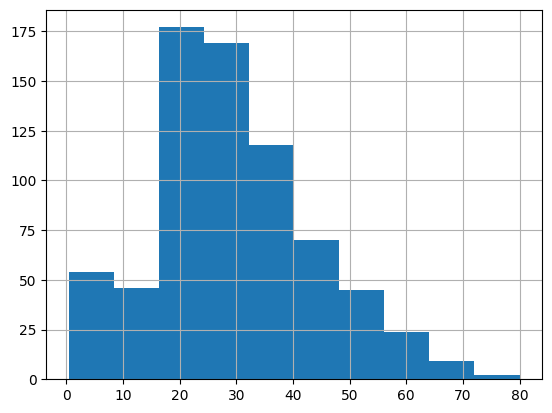

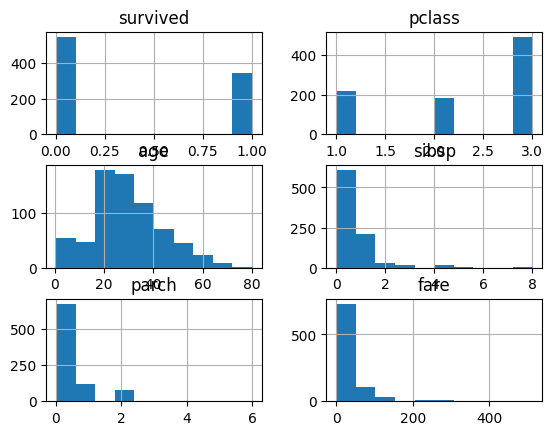

In [26]:
# histogram by numerical column
df['age'].hist() # plots the distribution of ages among the passengers

# histograms for all numerical columns
df.hist() # plots the distribution of each numerical attribute in the dataset, such as age, fare, number of siblings/spouses (sibsp), and number of parents/children (parch).

# show all plots
plt.show()

DOCUMENT OBSERVATIONS

**Initial Data Distribution for Categorical Columns**

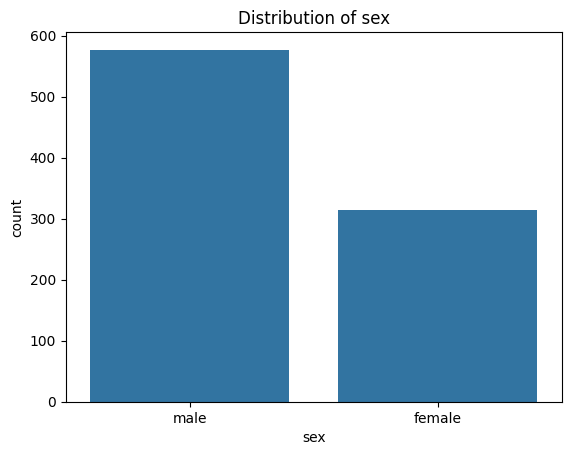

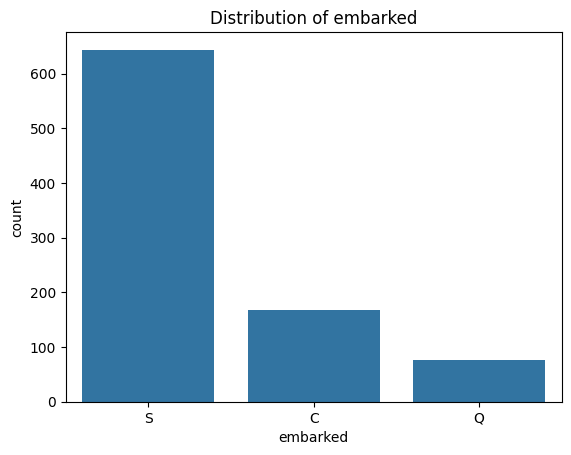

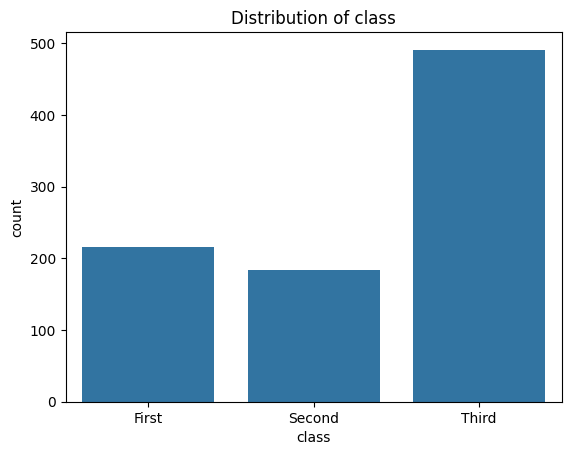

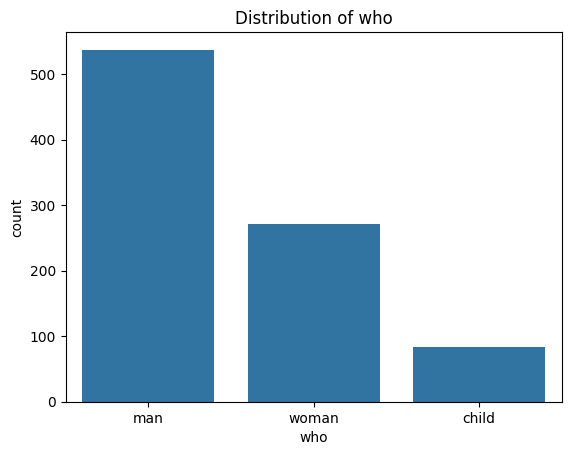

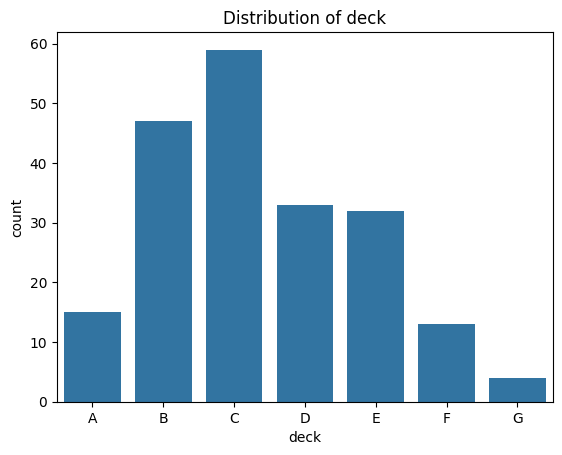

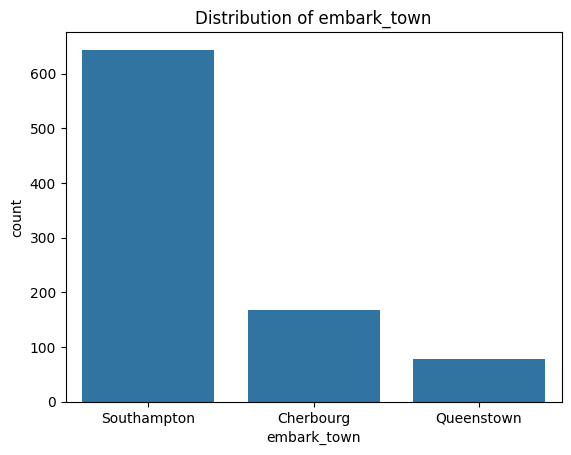

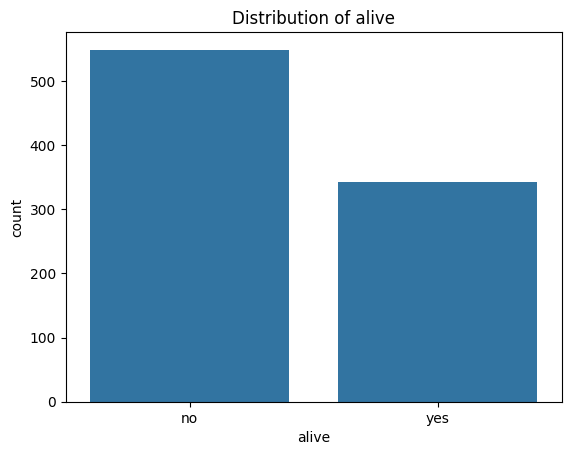

In [27]:
# inspect value counts by categorical column
df['class'].value_counts() # displays the count of unique values in the 'class' column

# inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# show all plots
plt.show()

DOCUMENT OBSERVATIONS

**Initial Data Transformation and Feature Engineering**

In [30]:
# rename a column
df.rename(columns={'fare': 'ticket_price'}, inplace=True) 

# add a new column
inflation_rate = 14214.51 / 100  # England has seen a 14,214.51% inflation rate since 1912, expressed as a decimal
df['inflation'] = df['ticket_price'] * (1 + inflation_rate)

# display the modified data
print(df.head())

   survived  pclass     sex   age  sibsp  parch  ticket_price embarked  class  \
0         0       3    male  22.0      1      0        7.2500        S  Third   
1         1       1  female  38.0      1      0       71.2833        C  First   
2         1       3  female  26.0      0      0        7.9250        S  Third   
3         1       1  female  35.0      1      0       53.1000        S  First   
4         0       3    male  35.0      0      0        8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone     inflation  
0    man        True  NaN  Southampton    no  False   1037.801975  
1  woman       False    C    Cherbourg   yes  False  10203.855107  
2  woman       False  NaN  Southampton   yes   True   1134.424917  
3  woman       False    C  Southampton   yes  False   7601.004810  
4    man        True  NaN  Southampton    no   True   1152.318055  


**Initial Visualizations**

Survival Rate by Sex

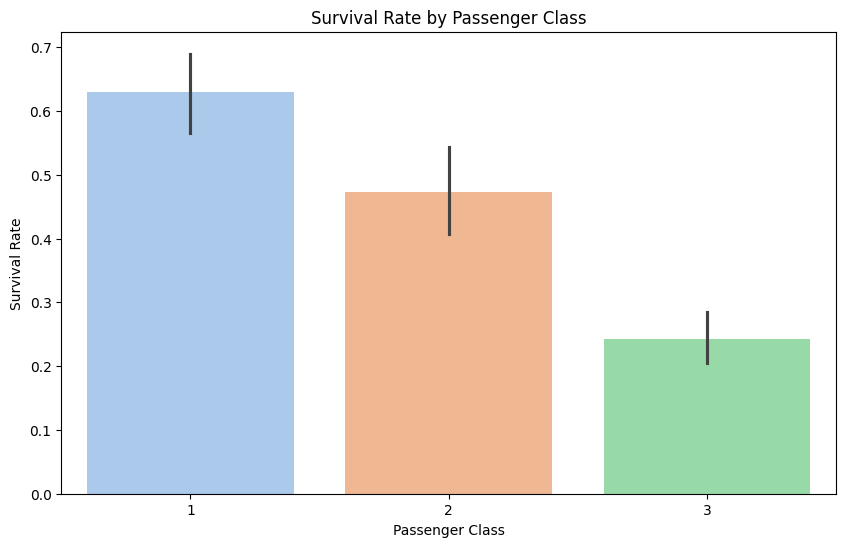

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='pclass', data=df, palette='pastel', legend=False)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
